In [54]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score
pd.set_option('display.max_columns',None)


### Loading the database

In [55]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

## Gathering some basic information about the database

In [56]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [57]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## PLotting the bar-graph for majority and minority classes along with their frequency

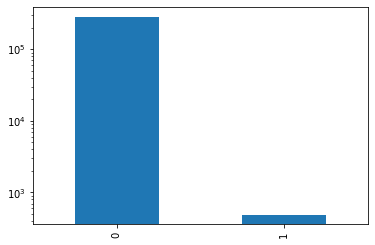

In [58]:
df.Class.value_counts().plot.bar(logy=True)

## Pre-processing of the dataset

In [59]:
# Check for row level duplicates 
print("original shape of dataframe :-",df.shape)
print("shape of dataframe after duplicate removal :-",df.drop_duplicates().shape)
# We have duplicates , so lets remove it 
df=df.drop_duplicates()

original shape of dataframe :- (284807, 31)
shape of dataframe after duplicate removal :- (283726, 31)


In [60]:
x=df.drop('Class',axis=1)
y=df['Class']
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)


## Plotting the Heat-Map after pre-processing the data

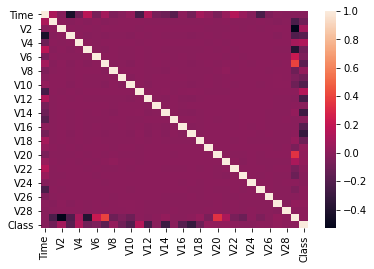

In [61]:
sns.heatmap(df.corr())

In [62]:
def model_fit(model,x_train,y_train,x_test,y_test,model_name): 
    model_cur=model.fit(x_train,y_train)
    predictions=model_cur.predict(x_test)
    model_evaluation(y_test,predictions,model_name)
def model_evaluation(y_test,predictions,model_name): 
    print('f1 score for '+model_name+' is '+str(f1_score(y_test,predictions)))


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [64]:
models={'Logisitc regression': LogisticRegression(),
       'Decision tree classifier' : DecisionTreeClassifier(), 
       'Random forest Classifier': RandomForestClassifier() }


## Testing the F1 Score of different models before applying SMOTe on the dataset.

In [155]:

for model_name,model in models.items(): 
    model_fit(model,x_train,y_train,x_test,y_test,model_name)


f1 score for Logisitc regression is 0.6757990867579908
f1 score for Decision tree classifier is 0.7330960854092526
f1 score for Random forest Classifier is 0.8416666666666666


## Implementing SMOTe from scratch.

In [144]:
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import NearestNeighbors


def nearest_neighbour(X):
  nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
  euclidean,indices= nbs.kneighbors(X)
  return indices

def SMOTE_100(X):
  indices2 = nearest_neighbour(X)
  
  matrix=[]
  for m in range(len(indices2)):
    
    t=x1[indices2[m]]
    newt=pd.DataFrame(t)
    matrix.append([])
    
    for j in range(len(newt.columns)):
      matrix[m].append(random.choice(newt[j]))
  return np.asarray(matrix)




# Getting the number of Minority Class Instances in Training Set

In [120]:

unique, counts = np.unique(y_train, return_counts=True)
print(unique,counts)

minority_shape = dict(zip(unique, counts))[1]



[0 1] [198269    339]


# Storing the minority class instances separately

In [146]:

x1 = np.ones((minority_shape, x_train.shape[1]))

x1=[x_train.iloc[i] for i, v in enumerate(y_train) if v==1.0]

x1=np.array(x1)



# Applying 100% SMOTe

### Generating Training samples

In [147]:

sampled_instances = SMOTE_100(x1)
print(len(x1))
print(len(x_train.iloc[0]))
print((sampled_instances.shape))

X_TrainSMOTE=x_train
print(len(X_TrainSMOTE))
print(len(y_train))
print("x_train",len(x_train))


for i in range(len(sampled_instances)):
  X_TrainSMOTE = np.concatenate((x_train,sampled_instances), axis = 0)

y_sampled_instances = np.ones(minority_shape)

y_TrainSMOTE = np.concatenate((y_train,y_sampled_instances), axis=0)

339
30
(339, 30)
198608
198608
x_train 198608


In [148]:
print(len(X_TrainSMOTE))
print((len(y_TrainSMOTE)))

198947
198947


# Testing different models after applying 100% SMOTe

In [154]:
for model_name,model in models.items(): 
    model_fit(model,X_TrainSMOTE,y_TrainSMOTE,x_test,y_test,model_name)

f1 score for Logisitc regression is 0.728744939271255
f1 score for Decision tree classifier is 0.7418181818181818
f1 score for Random forest Classifier is 0.8477366255144032


## Comparing the results of F1-Score for different models on same data, after applying SMOTe and before applying SMOTe, we observe that always the accuracy is increasing with really noticable changes in some of the classifiers.